<a href="https://colab.research.google.com/github/rakibulhaque9954/resnet_model_-sec-13-emotion_model/blob/main/section_13_emotion_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libararies and Installations

## Imports

In [2]:
import tensorflow as tf
import numpy as np
# import wandb
import matplotlib.pyplot as plt
from keras.layers import InputLayer, Conv2D, BatchNormalization, Flatten, Dense, MaxPool2D, Dropout, Rescaling, RandomRotation, RandomFlip, RandomContrast
from keras.regularizers import L2
from keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from keras.metrics import CategoricalAccuracy, TopKCategoricalAccuracy
# import importlib

# tfp = importlib.import_module("tensorflow_probability") # another way to import libraries
import tensorflow_probability as tfp
from keras.optimizers import Adam
import seaborn as sns
from sklearn.metrics import confusion_matrix
import cv2
# from tensorflow.train import BytesList, Floatlist, Int64List
# from tensorflow.train import Example, Features, Feature

In [16]:
 !pip3 install kaggle





In [29]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


In [30]:
# giving user raed and write rights in kaggle file
!chmod 600 ~/.kaggle/kaggle.json


In [31]:
# copying api command of dataset from kaggle and downloading
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

 99% 305M/309M [00:09<00:00, 36.7MB/s]
100% 309M/309M [00:09<00:00, 34.1MB/s]


In [ ]:
! cp /Users/boss/Desktop/Python_files.nosync/Kaggle.nosync/kaggle.json /Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion_detection_model/kaggle

In [32]:
!unzip 'human-emotions-datasethes.zip' -d '/content/dataset'

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/EmotionsDataset/data/nothing/720.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/721.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/722.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/723.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/724.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/725.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/726.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/727.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/728.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/729.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/73.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/730.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/731.jpg  
  inflating: /content/dataset/EmotionsDataset/data/no

# Data Preprocessing

In [33]:
train_directory = '/content/dataset/Emotions Dataset/Emotions Dataset/train'
# using test dataset as val dataset
validation_directory = '/content/dataset/Emotions Dataset/Emotions Dataset/test'
CLASS_NAMES = ['angry', 'happy', 'sad'] # keep the order of the classses for consistency

In [34]:
CONFIGURATION =  {
    'BATCH_SIZE' : 32,
    'IM_SIZE': 256,
    'LEARNING_RATE': 0.001,
    'N_EPOCHS': 20,
    'DROPOUT_RATE': 0.0,
    'REGULARIZATION_RATE': 0.0,
    'N_FILTERS': 6,
    'KERNEL_SIZE': 3,
    'N_STRIDES': 1,
    'POOL_SIZE': 2,
    'N_DENSE_1': 100,
    'N_DENSE_2': 10,
    'NUM_CLASSES': 3

}

In [35]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = CLASS_NAMES,
    color_mode= 'rgb',
    batch_size = CONFIGURATION['BATCH_SIZE'],
    image_size=(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE']),
    seed = 99,
    shuffle = True

)

Found 6799 files belonging to 3 classes.


In [36]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_directory,
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = CLASS_NAMES,
    color_mode= 'rgb',
    batch_size = CONFIGURATION['BATCH_SIZE'],
    image_size=(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE']),
    seed = 99,
    shuffle = True

)

Found 2278 files belonging to 3 classes.


In [ ]:
for i in val_dataset.take(1):
  # visualizing labels and their respective values
  print(i) # binary vectors or int class depending on the mode

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[ 20.        ,  20.        ,  20.        ],
         [ 19.1875    ,  19.1875    ,  19.1875    ],
         [ 19.        ,  19.        ,  19.        ],
         ...,
         [ 29.125     ,  29.125     ,  29.125     ],
         [ 25.        ,  25.        ,  25.        ],
         [ 25.        ,  25.        ,  25.        ]],

        [[ 20.        ,  20.        ,  20.        ],
         [ 19.847656  ,  19.847656  ,  19.847656  ],
         [ 19.8125    ,  19.8125    ,  19.8125    ],
         ...,
         [ 28.820312  ,  28.820312  ,  28.820312  ],
         [ 25.660156  ,  25.660156  ,  25.660156  ],
         [ 25.        ,  25.        ,  25.        ]],

        [[ 20.6875    ,  20.6875    ,  20.6875    ],
         [ 21.246094  ,  21.246094  ,  21.246094  ],
         [ 21.847656  ,  21.847656  ,  21.847656  ],
         ...,
         [ 25.3125    ,  25.3125    ,  25.3125    ],
         [ 22.375     ,  22.375     ,  22.375 

# Dataset Visualization

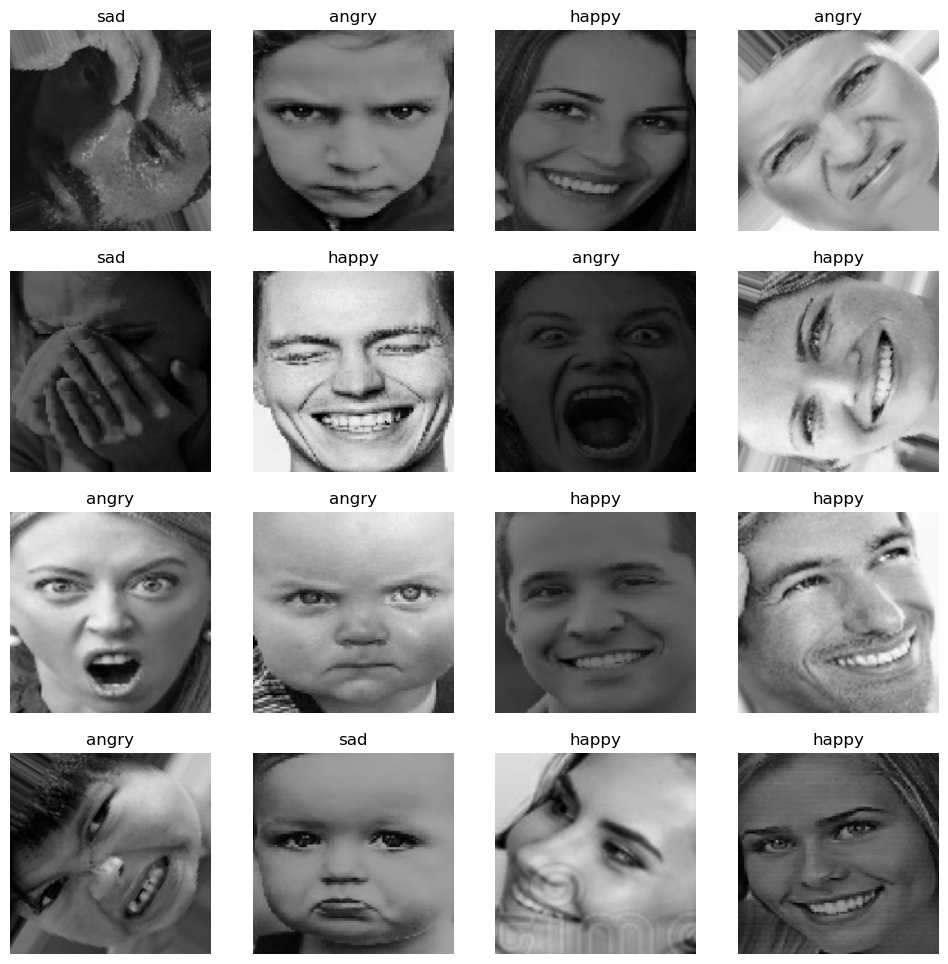

In [ ]:
plt.figure(figsize = (12, 12))
for images, labels in train_dataset.take(1): #taking 1 batch of images
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i]/255.0) # normalization
    label_index = tf.argmax(labels[i]).numpy()
    plt.title(CLASS_NAMES[label_index])
    # plt.title((tf.argmax(labels[i])).numpy()) printing when printing the index value of classes when using bianry vector mode
    ax.axis('off')

# Data Augmentation



In [38]:
augment_layers = tf.keras.Sequential([
    RandomRotation(factor= (-0.025, 0.025)), # rotation is limited
    RandomFlip(mode= 'horizontal'),
    RandomContrast(factor= 0.1)

])

In [39]:
def augment_layer(image, label):
    return augment_layers(image, training = True), label

## Cutmix augmentation

In [40]:
def box(lamda):
  # lamda = tfp.distributions.Beta(0.2, 0.2) # generates random values based on probabilites and proportions
  # lamda = lamda.sample(1)[0]

  r_x = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION['IM_SIZE']).sample(1)[0], dtype = tf.int32)
  r_y = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION['IM_SIZE']).sample(1)[0], dtype = tf.int32)

  r_w = tf.cast(CONFIGURATION['IM_SIZE'] * tf.math.sqrt(1 - lamda), dtype = tf.int32)
  r_h = tf.cast(CONFIGURATION['IM_SIZE'] * tf.math.sqrt(1 - lamda), dtype = tf.int32)

  r_x = tf.clip_by_value(r_x - r_w // 2, 0, CONFIGURATION['IM_SIZE'])
  r_y = tf.clip_by_value(r_y - r_h // 2, 0, CONFIGURATION['IM_SIZE']) # this method_makes sure that the value stays only between 0, IM_SIZE not negative

  x_b_r = tf.clip_by_value(r_x + r_w // 2, 0, CONFIGURATION['IM_SIZE'])
  y_b_r = tf.clip_by_value(r_y + r_h // 2, 0, CONFIGURATION['IM_SIZE']) # x_b_r is x bottom right and clip is to make the sure value is always inside the image bounds

  r_w = x_b_r - r_x
  if (r_w == 0):
    r_w = 1

  r_h = y_b_r - r_y
  if (r_h == 0):
    r_h = 1

  return r_y, r_x, r_h, r_w

In [41]:
def cutmix(train_dataset_1, train_dataset_2):
  (image_1, label_1), (image_2, label_2) = train_dataset_1, train_dataset_2

  lamda = tfp.distributions.Beta(0.2, 0.2) # generates random values based on probabilites and proportions
  lamda = lamda.sample(1)[0]

  r_y, r_x, r_h, r_w = box(lamda) # calling the function that creats random box in the image

  crop_1 = tf.image.crop_to_bounding_box(image_2, r_y, r_x, r_h, r_w)
  pad_1 = tf.image.pad_to_bounding_box(crop_1, r_y, r_x, CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'])

  crop_2 = tf.image.crop_to_bounding_box(image_1, r_y, r_x, r_h, r_w)
  pad_2 = tf.image.pad_to_bounding_box(crop_2, r_y, r_x, CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE'])

  image = image_1 - pad_2 + pad_1

  # for label
  lamda = tf.cast(1 - (r_w * r_h) / (CONFIGURATION['IM_SIZE'] * CONFIGURATION['IM_SIZE']) , dtype= tf.float32)
  label = lamda* tf.cast(label_1, dtype = tf.float32) + (1-lamda)* tf.cast(label_2, dtype = tf.float32)

  return image, label

In [42]:
# data preparation for cutmix
train_dataset_1 = train_dataset.map(augment_layer, num_parallel_calls= tf.data.AUTOTUNE)
train_dataset_2 = train_dataset.map(augment_layer, num_parallel_calls= tf.data.AUTOTUNE)

mixed_dataset = tf.data.Dataset.zip((train_dataset_1, train_dataset_2))

In [43]:
training_dataset = (
    mixed_dataset
    .map(cutmix, num_parallel_calls = tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
    )

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


# Dataset Preparation

In [44]:
# training_dataset = (
#     train_dataset
#     .map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)
#     .prefetch(tf.data.AUTOTUNE)
# )
# using cutmix thats why in comments

In [45]:
validation_dataset = (
    val_dataset
    .prefetch(tf.data.AUTOTUNE)
)

In [46]:
resize_rescale_layers = tf.keras.Sequential([
    tf.keras.layers.Resizing(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE']),
    tf.keras.layers.Rescaling(1./255)
]) # its good for deployment and prevents extra steps

# Modeling

## Resnet architecture

### Custom Conv2D

In [47]:
from keras.layers import Layer, Conv2D, BatchNormalization
class CustomConv2D(Layer):
    def __init__(self, n_filters, kernel_size, n_strides, padding = 'valid'):
        super(CustomConv2D, self).__init__(name = 'custom_conv_layer')

        self.conv = Conv2D(
            filters = n_filters,
            kernel_size = kernel_size,
            activation = 'relu',
            strides = n_strides,
            padding = padding

        )

        self.batch_norm = BatchNormalization() # when training is true the paramters and weights will be adjusted but if infernce and
        # training is false the parameters and weights wont be adjusted

    def call(self, x, training = True):

        x = self.conv(x)
        x = self.batch_norm(x)

        return x

### Residual Block

In [48]:
from keras.layers import Activation, Layer, Add
class ResidualBlock(Layer):
    def __init__(self, n_channels, n_strides = 1):
        super(ResidualBlock, self).__init__(name = 'res_block')

        self.dotted = n_strides != 1

        self.custom_conv_1 = CustomConv2D(n_channels, 3, n_strides, padding = 'same')
        self.custom_conv_2 = CustomConv2D(n_channels, 3, 1, padding = 'same')

        self.activation = Activation('relu')

        if self.dotted:
            self.custom_conv_3 = CustomConv2D(n_channels, 1, n_strides)


    def call(self, input, training):

        x = self.custom_conv_1(input, training)
        x = self.custom_conv_2(x, training)

        if self.dotted:
            x_add = self.custom_conv_3(input, training)
            x_add = Add()([x, x_add])

        else:
            x_add = Add()([x, input])

        return self.activation(x_add)

### Model

In [49]:
# subclassing
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
class ResNet34(tf.keras.models.Model): # 34 layers thats why resnet34
    def __init__(self):
        super(ResNet34, self).__init__(name = 'resnet34')

        self.conv_1 = CustomConv2D(64, 7, 2, padding = 'same')
        self.max_pool = MaxPooling2D(3, 2)

        self.conv_2_1 = ResidualBlock(64)
        self.conv_2_2 = ResidualBlock(64)
        self.conv_2_3 = ResidualBlock(64)

        self.conv_3_1 = ResidualBlock(128, 2) # number of strides
        self.conv_3_2 = ResidualBlock(128)
        self.conv_3_3 = ResidualBlock(128)
        self.conv_3_4 = ResidualBlock(128)

        self.conv_4_1 = ResidualBlock(256, 2)
        self.conv_4_2 = ResidualBlock(256)
        self.conv_4_3 = ResidualBlock(256)
        self.conv_4_4 = ResidualBlock(256)
        self.conv_4_5 = ResidualBlock(256)
        self.conv_4_6 = ResidualBlock(256)

        self.conv_5_1 = ResidualBlock(512, 2)
        self.conv_5_2 = ResidualBlock(512)
        self.conv_5_3 = ResidualBlock(512)

        self.global_pool = GlobalAveragePooling2D()

        self.fc_3 = Dense(CONFIGURATION['NUM_CLASSES'], activation = 'softmax')

    def call(self, x, training = True):
        x = self.conv_1(x)
        x = self.max_pool(x)

        x = self.conv_2_1(x, training)
        x = self.conv_2_2(x, training)
        x = self.conv_2_3(x, training)

        x = self.conv_3_1(x, training)
        x = self.conv_3_2(x, training)
        x = self.conv_3_3(x, training)
        x = self.conv_3_4(x, training)

        x = self.conv_4_1(x, training)
        x = self.conv_4_2(x, training)
        x = self.conv_4_3(x, training)
        x = self.conv_4_4(x, training)
        x = self.conv_4_5(x, training)
        x = self.conv_4_6(x, training)

        x = self.conv_5_1(x, training)
        x = self.conv_5_2(x, training)
        x = self.conv_5_3(x, training)

        x = self.global_pool(x)

        return self.fc_3(x)


In [50]:
resnet34 = ResNet34()
resnet34(tf.zeros([1, 256, 256, 3]), training = False) # passing in input just to see summary
resnet34.summary()

Model: "resnet34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 custom_conv_layer (CustomCo  multiple                 9728      
 nv2D)                                                           
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 res_block (ResidualBlock)   multiple                  74368     
                                                                 
 res_block (ResidualBlock)   multiple                  74368     
                                                                 
 res_block (ResidualBlock)   multiple                  74368     
                                                                 
 res_block (ResidualBlock)   multiple                  231

# Training

In [58]:
from keras.callbacks import ModelCheckpoint


checkpoint_callback = ModelCheckpoint(
    'best_weights', monitor='val_accuracy', mode= 'max', verbose= 1, save_best_only= True
)

In [54]:
# when the dataset is in vector mode or categorical mode [0, 1, 0] belongs to class 2 for instance
loss_function = CategoricalCrossentropy()
# incase our dataset mode is int where labels are [0, 1, 2]then we use:
# loss_function = SparseCategoricalCrossentropy()

In [55]:
metrics = [CategoricalAccuracy(name = 'accuracy'), TopKCategoricalAccuracy(k = 2, name = 'top_k_accuracy')]


In [56]:
resnet34.compile(
    optimizer =  tf.keras.optimizers.legacy.Adam(learning_rate = CONFIGURATION['LEARNING_RATE']* 10),
    loss = loss_function,
    metrics = metrics
)

In [59]:
history = resnet34.fit(
    training_dataset,
    validation_data = validation_dataset,
    epochs = CONFIGURATION['N_EPOCHS'] * 3,
    verbose = 1,
    callbacks= [checkpoint_callback]
)

Epoch 1/60
213/213 [==============================] - ETA: 0s - loss: 1.1379 - accuracy: 0.4696 - top_k_accuracy: 0.7638
Epoch 1: val_accuracy improved from -inf to 0.34636, saving model to best_weights


213/213 [==============================] - 64s 298ms/step - loss: 1.1379 - accuracy: 0.4696 - top_k_accuracy: 0.7638 - val_loss: 1.3831 - val_accuracy: 0.3464 - val_top_k_accuracy: 0.5755
Epoch 2/60
213/213 [==============================] - ETA: 0s - loss: 1.0643 - accuracy: 0.4942 - top_k_accuracy: 0.7886
Epoch 2: val_accuracy improved from 0.34636 to 0.47103, saving model to best_weights


213/213 [==============================] - 63s 291ms/step - loss: 1.0643 - accuracy: 0.4942 - top_k_accuracy: 0.7886 - val_loss: 1.0849 - val_accuracy: 0.4710 - val_top_k_accuracy: 0.7814
Epoch 3/60
213/213 [==============================] - ETA: 0s - loss: 1.0210 - accuracy: 0.5030 - top_k_accuracy: 0.7967
Epoch 3: val_accuracy improved from 0.47103 to 0.49078, saving model to best_weights


213/213 [==============================] - 64s 294ms/step - loss: 1.0210 - accuracy: 0.5030 - top_k_accuracy: 0.7967 - val_loss: 1.0201 - val_accuracy: 0.4908 - val_top_k_accuracy: 0.7985
Epoch 4/60
213/213 [==============================] - ETA: 0s - loss: 1.0164 - accuracy: 0.5036 - top_k_accuracy: 0.7976
Epoch 4: val_accuracy improved from 0.49078 to 0.51493, saving model to best_weights


213/213 [==============================] - 64s 295ms/step - loss: 1.0164 - accuracy: 0.5036 - top_k_accuracy: 0.7976 - val_loss: 1.1061 - val_accuracy: 0.5149 - val_top_k_accuracy: 0.7779
Epoch 5/60
213/213 [==============================] - ETA: 0s - loss: 0.9998 - accuracy: 0.5157 - top_k_accuracy: 0.8044
Epoch 5: val_accuracy did not improve from 0.51493
213/213 [==============================] - 48s 222ms/step - loss: 0.9998 - accuracy: 0.5157 - top_k_accuracy: 0.8044 - val_loss: 1.1239 - val_accuracy: 0.4394 - val_top_k_accuracy: 0.7349
Epoch 6/60
213/213 [==============================] - ETA: 0s - loss: 0.9999 - accuracy: 0.5210 - top_k_accuracy: 0.8153
Epoch 6: val_accuracy did not improve from 0.51493
213/213 [==============================] - 48s 220ms/step - loss: 0.9999 - accuracy: 0.5210 - top_k_accuracy: 0.8153 - val_loss: 1.2062 - val_accuracy: 0.4903 - val_top_k_accuracy: 0.7568
Epoch 7/60
213/213 [==============================] - ETA: 0s - loss: 0.9849 - accuracy: 0.5

213/213 [==============================] - 63s 292ms/step - loss: 0.9849 - accuracy: 0.5327 - top_k_accuracy: 0.8179 - val_loss: 0.9869 - val_accuracy: 0.5597 - val_top_k_accuracy: 0.8292
Epoch 8/60
213/213 [==============================] - ETA: 0s - loss: 0.9670 - accuracy: 0.5527 - top_k_accuracy: 0.8235
Epoch 8: val_accuracy did not improve from 0.55970
213/213 [==============================] - 49s 222ms/step - loss: 0.9670 - accuracy: 0.5527 - top_k_accuracy: 0.8235 - val_loss: 1.0481 - val_accuracy: 0.4881 - val_top_k_accuracy: 0.7779
Epoch 9/60
213/213 [==============================] - ETA: 0s - loss: 0.9420 - accuracy: 0.5689 - top_k_accuracy: 0.8366
Epoch 9: val_accuracy improved from 0.55970 to 0.57024, saving model to best_weights


213/213 [==============================] - 63s 292ms/step - loss: 0.9420 - accuracy: 0.5689 - top_k_accuracy: 0.8366 - val_loss: 0.9877 - val_accuracy: 0.5702 - val_top_k_accuracy: 0.8169
Epoch 10/60
213/213 [==============================] - ETA: 0s - loss: 0.9206 - accuracy: 0.5854 - top_k_accuracy: 0.8494
Epoch 10: val_accuracy improved from 0.57024 to 0.62160, saving model to best_weights


213/213 [==============================] - 64s 294ms/step - loss: 0.9206 - accuracy: 0.5854 - top_k_accuracy: 0.8494 - val_loss: 0.8436 - val_accuracy: 0.6216 - val_top_k_accuracy: 0.8600
Epoch 11/60
213/213 [==============================] - ETA: 0s - loss: 0.8760 - accuracy: 0.6148 - top_k_accuracy: 0.8629
Epoch 11: val_accuracy did not improve from 0.62160
213/213 [==============================] - 48s 221ms/step - loss: 0.8760 - accuracy: 0.6148 - top_k_accuracy: 0.8629 - val_loss: 1.0571 - val_accuracy: 0.4719 - val_top_k_accuracy: 0.7739
Epoch 12/60
213/213 [==============================] - ETA: 0s - loss: 0.8560 - accuracy: 0.6329 - top_k_accuracy: 0.8687
Epoch 12: val_accuracy improved from 0.62160 to 0.63608, saving model to best_weights


213/213 [==============================] - 63s 292ms/step - loss: 0.8560 - accuracy: 0.6329 - top_k_accuracy: 0.8687 - val_loss: 0.7991 - val_accuracy: 0.6361 - val_top_k_accuracy: 0.8854
Epoch 13/60
213/213 [==============================] - ETA: 0s - loss: 0.8341 - accuracy: 0.6544 - top_k_accuracy: 0.8822
Epoch 13: val_accuracy improved from 0.63608 to 0.66462, saving model to best_weights


213/213 [==============================] - 64s 294ms/step - loss: 0.8341 - accuracy: 0.6544 - top_k_accuracy: 0.8822 - val_loss: 0.7547 - val_accuracy: 0.6646 - val_top_k_accuracy: 0.8990
Epoch 14/60
213/213 [==============================] - ETA: 0s - loss: 0.8085 - accuracy: 0.6779 - top_k_accuracy: 0.8856
Epoch 14: val_accuracy did not improve from 0.66462
213/213 [==============================] - 48s 221ms/step - loss: 0.8085 - accuracy: 0.6779 - top_k_accuracy: 0.8856 - val_loss: 0.8596 - val_accuracy: 0.5896 - val_top_k_accuracy: 0.8547
Epoch 15/60
213/213 [==============================] - ETA: 0s - loss: 0.7844 - accuracy: 0.6857 - top_k_accuracy: 0.8962
Epoch 15: val_accuracy did not improve from 0.66462
213/213 [==============================] - 48s 219ms/step - loss: 0.7844 - accuracy: 0.6857 - top_k_accuracy: 0.8962 - val_loss: 0.7895 - val_accuracy: 0.6356 - val_top_k_accuracy: 0.8810
Epoch 16/60
213/213 [==============================] - ETA: 0s - loss: 0.7643 - accuracy

213/213 [==============================] - 63s 292ms/step - loss: 0.7643 - accuracy: 0.7045 - top_k_accuracy: 0.9026 - val_loss: 0.7820 - val_accuracy: 0.6681 - val_top_k_accuracy: 0.8938
Epoch 17/60
213/213 [==============================] - ETA: 0s - loss: 0.7515 - accuracy: 0.7139 - top_k_accuracy: 0.9048
Epoch 17: val_accuracy did not improve from 0.66813
213/213 [==============================] - 49s 222ms/step - loss: 0.7515 - accuracy: 0.7139 - top_k_accuracy: 0.9048 - val_loss: 0.8982 - val_accuracy: 0.5689 - val_top_k_accuracy: 0.8446
Epoch 18/60
213/213 [==============================] - ETA: 0s - loss: 0.7393 - accuracy: 0.7167 - top_k_accuracy: 0.9041
Epoch 18: val_accuracy improved from 0.66813 to 0.69183, saving model to best_weights


213/213 [==============================] - 63s 291ms/step - loss: 0.7393 - accuracy: 0.7167 - top_k_accuracy: 0.9041 - val_loss: 0.6842 - val_accuracy: 0.6918 - val_top_k_accuracy: 0.9061
Epoch 19/60
213/213 [==============================] - ETA: 0s - loss: 0.7362 - accuracy: 0.7294 - top_k_accuracy: 0.9120
Epoch 19: val_accuracy improved from 0.69183 to 0.72125, saving model to best_weights


213/213 [==============================] - 64s 296ms/step - loss: 0.7362 - accuracy: 0.7294 - top_k_accuracy: 0.9120 - val_loss: 0.6774 - val_accuracy: 0.7212 - val_top_k_accuracy: 0.9065
Epoch 20/60
213/213 [==============================] - ETA: 0s - loss: 0.7157 - accuracy: 0.7370 - top_k_accuracy: 0.9169
Epoch 20: val_accuracy did not improve from 0.72125
213/213 [==============================] - 48s 221ms/step - loss: 0.7157 - accuracy: 0.7370 - top_k_accuracy: 0.9169 - val_loss: 0.8180 - val_accuracy: 0.6317 - val_top_k_accuracy: 0.8797
Epoch 21/60
213/213 [==============================] - ETA: 0s - loss: 0.6973 - accuracy: 0.7447 - top_k_accuracy: 0.9209
Epoch 21: val_accuracy improved from 0.72125 to 0.76251, saving model to best_weights


213/213 [==============================] - 63s 291ms/step - loss: 0.6973 - accuracy: 0.7447 - top_k_accuracy: 0.9209 - val_loss: 1.9814 - val_accuracy: 0.7625 - val_top_k_accuracy: 0.9249
Epoch 22/60
213/213 [==============================] - ETA: 0s - loss: 0.6955 - accuracy: 0.7606 - top_k_accuracy: 0.9215
Epoch 22: val_accuracy did not improve from 0.76251
213/213 [==============================] - 48s 222ms/step - loss: 0.6955 - accuracy: 0.7606 - top_k_accuracy: 0.9215 - val_loss: 0.6532 - val_accuracy: 0.7129 - val_top_k_accuracy: 0.9175
Epoch 23/60
213/213 [==============================] - ETA: 0s - loss: 0.6686 - accuracy: 0.7632 - top_k_accuracy: 0.9231
Epoch 23: val_accuracy did not improve from 0.76251
213/213 [==============================] - 48s 221ms/step - loss: 0.6686 - accuracy: 0.7632 - top_k_accuracy: 0.9231 - val_loss: 0.5766 - val_accuracy: 0.7608 - val_top_k_accuracy: 0.9289
Epoch 24/60
213/213 [==============================] - ETA: 0s - loss: 0.6665 - accuracy

213/213 [==============================] - 63s 292ms/step - loss: 0.6716 - accuracy: 0.7697 - top_k_accuracy: 0.9315 - val_loss: 0.9018 - val_accuracy: 0.7871 - val_top_k_accuracy: 0.9359
Epoch 27/60
213/213 [==============================] - ETA: 0s - loss: 0.6498 - accuracy: 0.7820 - top_k_accuracy: 0.9303
Epoch 27: val_accuracy did not improve from 0.78709
213/213 [==============================] - 48s 222ms/step - loss: 0.6498 - accuracy: 0.7820 - top_k_accuracy: 0.9303 - val_loss: 0.9159 - val_accuracy: 0.6374 - val_top_k_accuracy: 0.8863
Epoch 28/60
213/213 [==============================] - ETA: 0s - loss: 0.6402 - accuracy: 0.7848 - top_k_accuracy: 0.9276
Epoch 28: val_accuracy did not improve from 0.78709
213/213 [==============================] - 48s 219ms/step - loss: 0.6402 - accuracy: 0.7848 - top_k_accuracy: 0.9276 - val_loss: 24.9171 - val_accuracy: 0.7340 - val_top_k_accuracy: 0.9232
Epoch 29/60
213/213 [==============================] - ETA: 0s - loss: 0.6467 - accurac

213/213 [==============================] - 63s 292ms/step - loss: 0.6247 - accuracy: 0.7932 - top_k_accuracy: 0.9409 - val_loss: 2.6173 - val_accuracy: 0.7976 - val_top_k_accuracy: 0.9394
Epoch 32/60
213/213 [==============================] - ETA: 0s - loss: 0.6113 - accuracy: 0.8009 - top_k_accuracy: 0.9373
Epoch 32: val_accuracy did not improve from 0.79763
213/213 [==============================] - 48s 221ms/step - loss: 0.6113 - accuracy: 0.8009 - top_k_accuracy: 0.9373 - val_loss: 0.5254 - val_accuracy: 0.7717 - val_top_k_accuracy: 0.9306
Epoch 33/60
213/213 [==============================] - ETA: 0s - loss: 0.6032 - accuracy: 0.8066 - top_k_accuracy: 0.9451
Epoch 33: val_accuracy did not improve from 0.79763
213/213 [==============================] - 48s 219ms/step - loss: 0.6032 - accuracy: 0.8066 - top_k_accuracy: 0.9451 - val_loss: 0.5156 - val_accuracy: 0.7915 - val_top_k_accuracy: 0.9421
Epoch 34/60
213/213 [==============================] - ETA: 0s - loss: 0.6066 - accuracy

213/213 [==============================] - 63s 292ms/step - loss: 0.5593 - accuracy: 0.8253 - top_k_accuracy: 0.9553 - val_loss: 27.5843 - val_accuracy: 0.8038 - val_top_k_accuracy: 0.9346
Epoch 40/60
213/213 [==============================] - ETA: 0s - loss: 0.5546 - accuracy: 0.8367 - top_k_accuracy: 0.9521
Epoch 40: val_accuracy did not improve from 0.80378
213/213 [==============================] - 48s 222ms/step - loss: 0.5546 - accuracy: 0.8367 - top_k_accuracy: 0.9521 - val_loss: 0.5469 - val_accuracy: 0.7919 - val_top_k_accuracy: 0.9425
Epoch 41/60
213/213 [==============================] - ETA: 0s - loss: 0.5374 - accuracy: 0.8504 - top_k_accuracy: 0.9625
Epoch 41: val_accuracy improved from 0.80378 to 0.82485, saving model to best_weights


213/213 [==============================] - 63s 291ms/step - loss: 0.5374 - accuracy: 0.8504 - top_k_accuracy: 0.9625 - val_loss: 3.3462 - val_accuracy: 0.8248 - val_top_k_accuracy: 0.9429
Epoch 42/60
213/213 [==============================] - ETA: 0s - loss: 0.5136 - accuracy: 0.8489 - top_k_accuracy: 0.9601
Epoch 42: val_accuracy did not improve from 0.82485
213/213 [==============================] - 48s 221ms/step - loss: 0.5136 - accuracy: 0.8489 - top_k_accuracy: 0.9601 - val_loss: 14.5549 - val_accuracy: 0.7867 - val_top_k_accuracy: 0.9399
Epoch 43/60
213/213 [==============================] - ETA: 0s - loss: 0.5191 - accuracy: 0.8541 - top_k_accuracy: 0.9632
Epoch 43: val_accuracy did not improve from 0.82485
213/213 [==============================] - 48s 219ms/step - loss: 0.5191 - accuracy: 0.8541 - top_k_accuracy: 0.9632 - val_loss: 17.1398 - val_accuracy: 0.7744 - val_top_k_accuracy: 0.9293
Epoch 44/60
213/213 [==============================] - ETA: 0s - loss: 0.5284 - accura

213/213 [==============================] - 63s 293ms/step - loss: 0.5362 - accuracy: 0.8575 - top_k_accuracy: 0.9607 - val_loss: 0.4700 - val_accuracy: 0.8288 - val_top_k_accuracy: 0.9535
Epoch 47/60
213/213 [==============================] - ETA: 0s - loss: 0.5189 - accuracy: 0.8632 - top_k_accuracy: 0.9671
Epoch 47: val_accuracy did not improve from 0.82880
213/213 [==============================] - 48s 222ms/step - loss: 0.5189 - accuracy: 0.8632 - top_k_accuracy: 0.9671 - val_loss: 0.4694 - val_accuracy: 0.8200 - val_top_k_accuracy: 0.9447
Epoch 48/60
213/213 [==============================] - ETA: 0s - loss: 0.5271 - accuracy: 0.8548 - top_k_accuracy: 0.9582
Epoch 48: val_accuracy improved from 0.82880 to 0.82924, saving model to best_weights


213/213 [==============================] - 63s 291ms/step - loss: 0.5271 - accuracy: 0.8548 - top_k_accuracy: 0.9582 - val_loss: 38.3995 - val_accuracy: 0.8292 - val_top_k_accuracy: 0.9442
Epoch 49/60
213/213 [==============================] - ETA: 0s - loss: 0.4986 - accuracy: 0.8678 - top_k_accuracy: 0.9671
Epoch 49: val_accuracy did not improve from 0.82924
213/213 [==============================] - 48s 222ms/step - loss: 0.4986 - accuracy: 0.8678 - top_k_accuracy: 0.9671 - val_loss: 0.4804 - val_accuracy: 0.8130 - val_top_k_accuracy: 0.9451
Epoch 50/60
213/213 [==============================] - ETA: 0s - loss: 0.5016 - accuracy: 0.8707 - top_k_accuracy: 0.9684
Epoch 50: val_accuracy improved from 0.82924 to 0.83055, saving model to best_weights


213/213 [==============================] - 63s 291ms/step - loss: 0.5016 - accuracy: 0.8707 - top_k_accuracy: 0.9684 - val_loss: 0.4564 - val_accuracy: 0.8306 - val_top_k_accuracy: 0.9486
Epoch 51/60
213/213 [==============================] - ETA: 0s - loss: 0.4825 - accuracy: 0.8795 - top_k_accuracy: 0.9734
Epoch 51: val_accuracy improved from 0.83055 to 0.83231, saving model to best_weights


213/213 [==============================] - 64s 294ms/step - loss: 0.4825 - accuracy: 0.8795 - top_k_accuracy: 0.9734 - val_loss: 0.4445 - val_accuracy: 0.8323 - val_top_k_accuracy: 0.9561
Epoch 52/60
213/213 [==============================] - ETA: 0s - loss: 0.4726 - accuracy: 0.8857 - top_k_accuracy: 0.9743
Epoch 52: val_accuracy improved from 0.83231 to 0.84723, saving model to best_weights


213/213 [==============================] - 63s 293ms/step - loss: 0.4726 - accuracy: 0.8857 - top_k_accuracy: 0.9743 - val_loss: 0.4317 - val_accuracy: 0.8472 - val_top_k_accuracy: 0.9530
Epoch 53/60
213/213 [==============================] - ETA: 0s - loss: 0.4772 - accuracy: 0.8881 - top_k_accuracy: 0.9719
Epoch 53: val_accuracy did not improve from 0.84723
213/213 [==============================] - 48s 221ms/step - loss: 0.4772 - accuracy: 0.8881 - top_k_accuracy: 0.9719 - val_loss: 0.4439 - val_accuracy: 0.8244 - val_top_k_accuracy: 0.9504
Epoch 54/60
213/213 [==============================] - ETA: 0s - loss: 0.4629 - accuracy: 0.8935 - top_k_accuracy: 0.9744
Epoch 54: val_accuracy did not improve from 0.84723
213/213 [==============================] - 48s 219ms/step - loss: 0.4629 - accuracy: 0.8935 - top_k_accuracy: 0.9744 - val_loss: 0.4755 - val_accuracy: 0.8205 - val_top_k_accuracy: 0.9522
Epoch 55/60
213/213 [==============================] - ETA: 0s - loss: 0.4780 - accuracy

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
!cp -r /content/best_weights /content/drive/MyDrive/Colab\ Notebooks/resnet_emotion_model_weights


# Model loss and accuracy Visualization

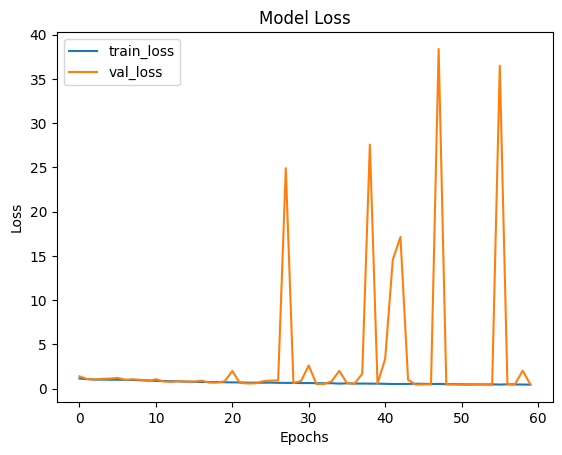

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train_loss', 'val_loss'])
plt.show()

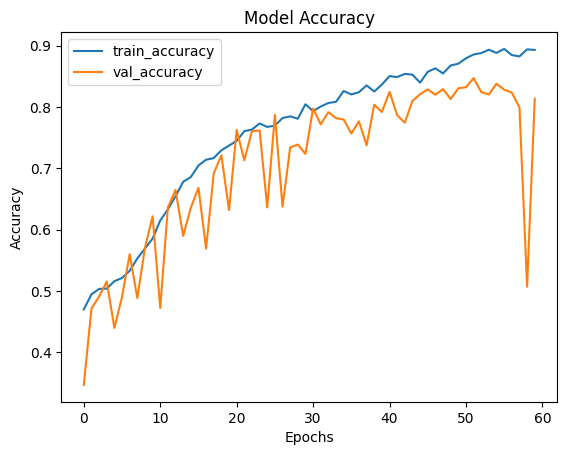

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

# Load  Resnet34 Model's Saved checkpoint from drive

In [64]:
resnet34.load_weights('/content/drive/MyDrive/Colab Notebooks/resnet_emotion_model_weights')
# now the model can used the saved weights and params that was trained previously to detect emotions with ease

# Evaluation

In [65]:
resnet34.evaluate(validation_dataset)

72/72 [==============================] - 4s 59ms/step - loss: 0.4317 - accuracy: 0.8472 - top_k_accuracy: 0.9530


[0.43172356486320496, 0.8472344279289246, 0.9530289769172668]

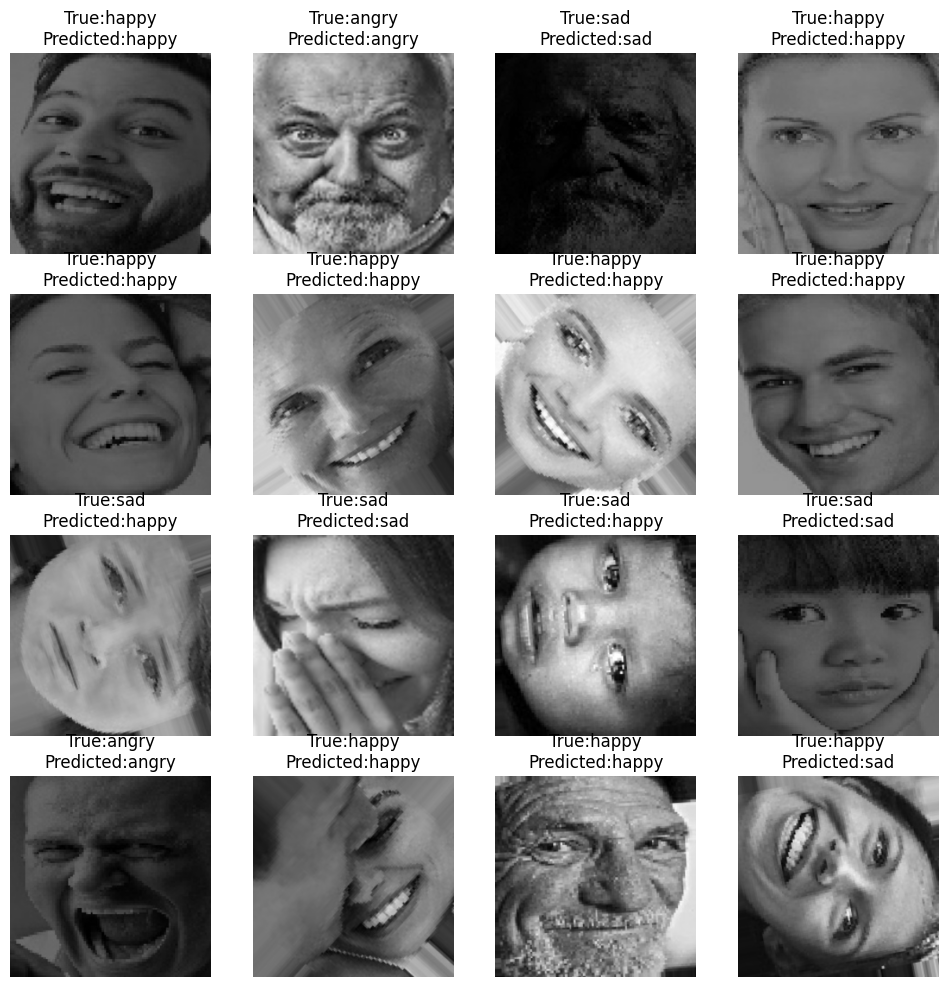

In [67]:
plt.figure(figsize = (12, 12))
for images, labels in validation_dataset.take(1): #taking 1 batch of images
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i]/255.0) # normalization
    label_index = tf.argmax(labels[i]).numpy()
    predicted_index = tf.argmax(resnet34(tf.expand_dims(images[i], axis = 0)).numpy()[0])
    plt.title('True:' + CLASS_NAMES[label_index] + '\n' + 'Predicted:' + CLASS_NAMES[predicted_index])
    ax.axis('off')

In [68]:
13/16 # accuracy rate

0.8125

# Testing

In [71]:
test_image = cv2.imread('/content/dataset/Emotions Dataset/Emotions Dataset/test/happy/110020.jpg_brightness_2.jpg')

# converting image to tensor
image = tf.constant(test_image, dtype = tf.float32)

# expanding dimensions or batching
image = tf.expand_dims(image, axis = 0) # axis = 0 means adding dimesion along the front for instance: (224, 224, 3) -> (0, 224, 224, 3) batched tensor

print(CLASS_NAMES[tf.argmax(resnet34(image), axis = -1).numpy()[0]]) # printing alongwith class since our dataset was preset with vector mode

happy


# Confusion matrix

In [73]:
predicted = []
labels = []
for im, label in validation_dataset:
    predicted.append(resnet34(im))
    labels.append(label.numpy())


In [74]:
print(np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()]))

[2 1 2 ... 0 2 0]
[2 1 2 ... 2 2 0]


In [75]:
pred = np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()])
label = np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1).flatten()])

[[371  49  95]
 [ 20 919  67]
 [ 39  59 659]]


Text(0.5, 58.7222222222222, 'Predicted')

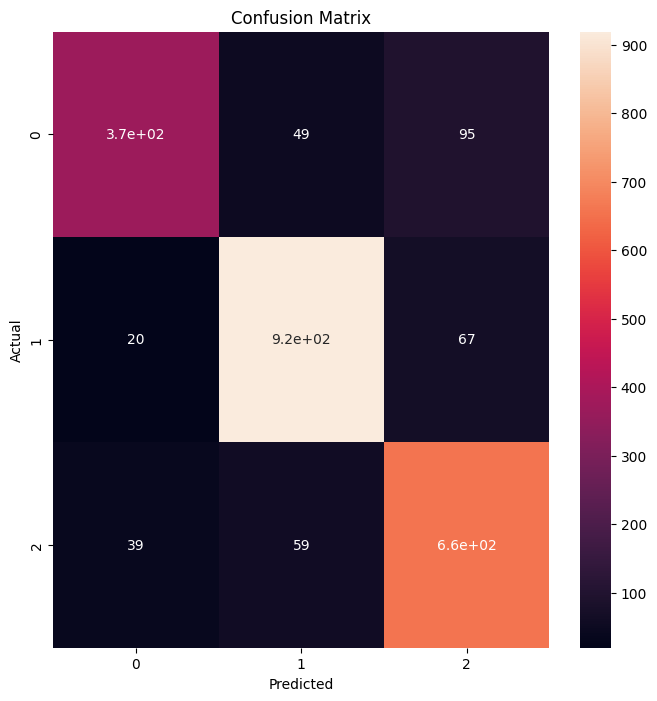

In [76]:
cm = confusion_matrix(label , pred)
print(cm)
plt.figure(figsize=(8, 8))

sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
resnet34.save('trained_model.h5')

# Tensorflow Records

## Augmenting Dataset before creating records and sending to unbacthing

In [ ]:
training_dataset = (
    train_dataset
    .map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)
)

In [ ]:
validation_dataset = (
    val_dataset
    # .prefetch(tf.data.AUTOTUNE)
)

## Unabatching

In [ ]:
training_dataset = (
    training_dataset
    .unbatch()
)

In [ ]:
validation_dataset = (
    validation_dataset
    .unbatch()
)

In [ ]:
def create_example(image, label):
    bytes_feature = tf.train.Feature(
        bytes_list = tf.train.BytesList(value = [image])
    )

    int_feature = tf.train.Feature(
        int64_list = tf.train.Int64List(value = [int(label[0])])
    )

    example = tf.train.Example(
        features = tf.train.Features( feature =
                                    {
                                        'labels' : int_feature, # because classes are in int
                                        'images' : bytes_feature # because images are supposed to be in bytes
                                    })
    )
    return example.SerializeToString()

In [ ]:
NUM_SHARDS = 10
PATH = '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_{:02d}.tfrecord'


In [ ]:
def encode_image(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.uint8)
    image = tf.io.encode_jpeg(image)
    return image, label

In [ ]:
encoded_dataset = (
    training_dataset
    .map(encode_image)
)

## Saving the dataset

In [ ]:
for shard_number in range(NUM_SHARDS):

    sharded_dataset = (
        encoded_dataset
        .shard(NUM_SHARDS, shard_number)
        .as_numpy_iterator()
    )

    with tf.io.TFRecordWriter(PATH.format(shard_number)) as file_writer:
        for image, label in sharded_dataset:
            file_writer.write(create_example(image, label))

## Reconstruction of Dataset for usage

In [ ]:
reconstruct_dataset = tf.data.TFRecordDataset(filenames= [ PATH.format(p) for p in range(NUM_SHARDS)])

In [ ]:
l = [ PATH.format(p) for p in range(NUM_SHARDS)]
print(l)

['/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_00.tfrecord', '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_01.tfrecord', '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_02.tfrecord', '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_03.tfrecord', '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_04.tfrecord', '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_05.tfrecord', '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_06.tfrecord', '/Users/boss/Desktop/Python_files.nosync/ML_projects_git_commit.nosync/Emotion-detection-model/tf-records/shard_07.tf

In [ ]:
def parse_tfrecords(example):

    feature_description = {
        'images' : tf.io.FixedLenFeature([], tf.string),
        'labels' : tf.io.FixedLenFeature([], tf.int64)
    }

    example = tf.io.parse_single_example(example, feature_description)
    example['images'] = tf.io.decode_jpeg(example['images'], channels = 3)

    return example['images'], example['labels']

In [ ]:
parsed_dataset = (
    reconstruct_dataset
    .map(parse_tfrecords)
    .batch(CONFIGURATION['BATCH_SIZE'])
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
for i in parsed_dataset.take(1):
    print(i)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=uint8, numpy=
array([[[[131, 131, 131],
         [ 73,  73,  73],
         [165, 165, 165],
         ...,
         [ 55,  55,  55],
         [125, 125, 125],
         [200, 200, 200]],

        [[138, 138, 138],
         [188, 188, 188],
         [159, 159, 159],
         ...,
         [102, 102, 102],
         [ 35,  35,  35],
         [150, 150, 150]],

        [[238, 238, 238],
         [ 37,  37,  37],
         [ 39,  39,  39],
         ...,
         [137, 137, 137],
         [204, 204, 204],
         [164, 164, 164]],

        ...,

        [[ 77,  77,  77],
         [147, 147, 147],
         [134, 134, 134],
         ...,
         [120, 120, 120],
         [117, 117, 117],
         [ 52,  52,  52]],

        [[ 17,  17,  17],
         [145, 145, 145],
         [223, 223, 223],
         ...,
         [234, 234, 234],
         [  3,   3,   3],
         [249, 249, 249]],

        [[ 50,  50,  50],
         [ 31,  31,  31],
         [165, 1

In [ ]:
# the labels can be again preset to class numbers or int mode by using argmax